[View in Colaboratory](https://colab.research.google.com/github/kaushik9728/Predicting-Customer-Churn/blob/master/customer%20churn%20prediction.ipynb)

**Predicting Customer Churn**

**This is a dataset from an unknown telecommunication company with all the details of the customers, their calling minutes,calling time,charge and even the customer care calling time and we need to predict on the basis of this data whether a customer will churn or will stay.**

**Import the libraries**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

**It is customer data for an unidentified telecommunications company. Let's upload the data**

In [4]:
uploaded = files.upload()

Saving telecommunication.csv to telecommunication.csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "telecommunication.csv" with length 310007 bytes


In [0]:
import io

In [0]:
df=pd.read_csv(io.StringIO(uploaded['telecommunication.csv'].decode('utf-8')))

**df.head() returns the first 5 rows of the dataset**

In [9]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
df.columns

Index([u'state', u'account length', u'area code', u'phone number',
       u'international plan', u'voice mail plan', u'number vmail messages',
       u'total day minutes', u'total day calls', u'total day charge',
       u'total eve minutes', u'total eve calls', u'total eve charge',
       u'total night minutes', u'total night calls', u'total night charge',
       u'total intl minutes', u'total intl calls', u'total intl charge',
       u'customer service calls', u'churn'],
      dtype='object')

**Let us check whether we have NULL/missing values in the dataset or not**

In [11]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Fortunately, we don't have any missing values**

**As our model is KNN and it only works with numerical variables, so for this model I will convert all possible all non-numerical variables.(There are techniques for using categorical variables like one-hot encoding, but we’ll ignore them here).**

In [0]:
df['international plan'] = pd.get_dummies(df['international plan'], drop_first=True)

In [0]:
df['voice mail plan'] = pd.get_dummies(df['voice mail plan'], drop_first=True)

In [0]:
df['churn'] = pd.get_dummies(df['churn'], drop_first=True)

In [0]:
df['state'] = pd.get_dummies(df['state'], drop_first=True)

In [16]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Phone number is something which has no significance in predicting the customer churn as it is unique for everyone. so we will drop this column**

In [0]:
df=df.drop(['phone number'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null uint8
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null uint8
voice mail plan           3333 non-null uint8
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
chu

**The Model**

KNN is a simple algorithm. When a new customer is presented, the algorithm looks through the database for customers who are most similar to the target customer. It then predicts if the customer would churn based on whether those similar customers churned or not.

**To make the model, I split the data into two. 70 per cent was put in a training set and used to create the model. The model was then used to predict if the other 30% churned or not.**

**The variables used to predict whether the customer churned available were:**

In [19]:
df.columns

Index([u'state', u'account length', u'area code', u'international plan',
       u'voice mail plan', u'number vmail messages', u'total day minutes',
       u'total day calls', u'total day charge', u'total eve minutes',
       u'total eve calls', u'total eve charge', u'total night minutes',
       u'total night calls', u'total night charge', u'total intl minutes',
       u'total intl calls', u'total intl charge', u'customer service calls',
       u'churn'],
      dtype='object')

In [0]:
X=df.drop(['churn'], axis=1)
y=df['churn']

**Train test split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape

(2333, 19)

**Creating and Training the Model**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

**Selecting K**

If K is too small the model will be “overfit”. This means that the model will do well on the data you used to create it, but when it comes across new observations it will perform poorly. If K is too high, the model will also perform poorly. The best value of K was selected by picking one that is not to high or low.

**Fitting the data in the model**

In [25]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

**Predictions from our Model**

In [0]:
predictions = neigh.predict(X_test)

**Model Evaluation**

Lets evaluate our model by checking some evaluation metrics

In [27]:
print('Score:')
score = neigh.score(X_test, y_test)
score

Score:


0.87

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
cm

Confusion Matrix:


array([[840,  17],
       [113,  30]])

In a nicer way, we can view our confusion matrix as a seaborn heatmap below:

Text(0.5,1,u'Accuracy Score: 0.87')

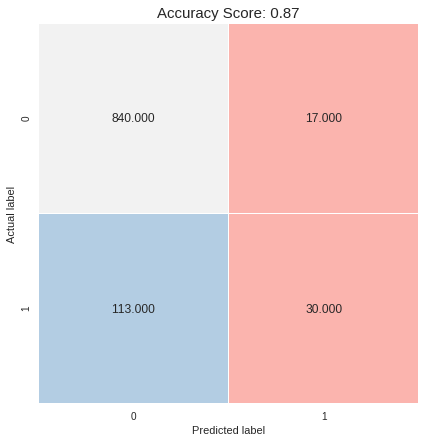

In [29]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: '+str(score)
plt.title(title, size = 15)

**Although the accuracy of 87 is quite good but we can still improve it through feature selection**

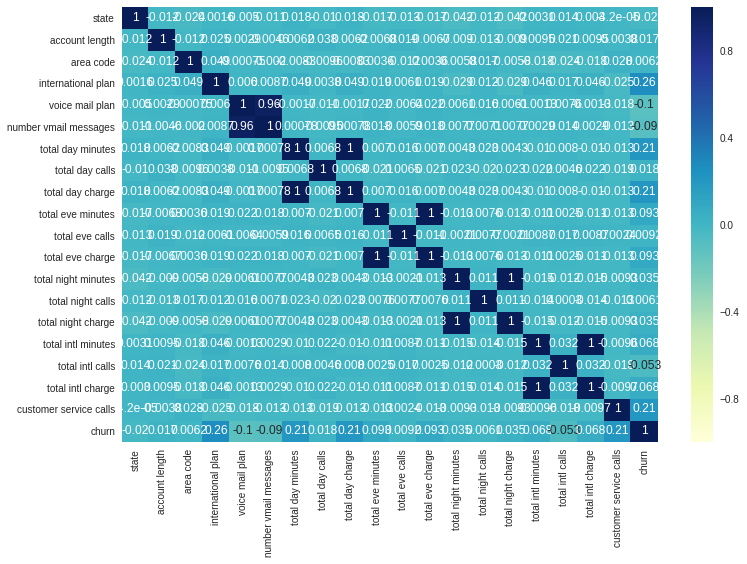

In [30]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True);

**This shows that customer service calls, number of mins called and credit used are the most informative variable. This is understandable, a client calling customer care a lot is probably not satisfied with the service so is more likely to churn. While people who make a lot of calls are probably satisfied with the service and so are unlikely to churn. So these three variables tell us a lot about the probability of a customer churning.**

**Feature Selection**

Not all variable are useful in predicting if a customer will churn. For example, the customers phone number is completely useless in predicting because it is unique to each customer.

A technique called information gain was used to see which variables are most important in predicting churn. Information gains looks at each variable individually and asks “If we split the data set by this variable alone, how much easier is it to make a prediction on the outcome”.



**So now let us try improving the model by deleting the not so important features**

In [0]:
X=df.drop(['churn','state','account length','area code','international plan','voice mail plan','number vmail messages','total day calls','total eve calls','total night calls','total intl calls'], axis=1)
y=df['churn']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
predictions = neigh.predict(X_test)

In [36]:
print('Score:')
score = neigh.score(X_test, y_test)
score

Score:


0.877

**Although not a huge improvement but still a little improvement in the accuracy by drop some features is quite good.**

**Probability Threshold**

*KNN gives a probability of a particular customer churning. The threshold is usually set to .5 by default. This means that anyone with a probability of more than .5 is predicted to churn. If you reduce the probability threshold, more people will be predicted to churn, this gives you a higher number of “at risk customers” to target. However, this increases the likelihood that customers who are not at risk will pass the threshold and be predicted to churn.*

The choice of the probability threshold will be based on the business context, if the company wants to target a large amount of customers then a low threshold will be set. However, if the company wants to be more efficient in spending a higher threshold will be set, at the cost of a smaller number of customers to target.

**Business Implications.**

With this model, one can predict which customers are at risk of churning. The company can then take steps to retain these customers, for example:

1 .Customer Satisfaction Surveys can be sent to the at “risk customers” to try to find out what their opinion of the company and possible complaints are.

2 .Discounts or other incentives can be offered to at risk customers to try to retain them.

3 .Retention Marketing: The at risk customers can be specially added to retention marketing lists so that Google Ads, Facebook, Twitter or Email campaigns be used to target them specifically.

4 .Customers with a low probability of churning can be removed from re-targeting lists, this could lead to cost saving in marketing.

If the company has segmented its customers and has an understanding of the types of customers with the highest lifetime value. Then the most valuable at risk customers can be targeted specifically with the above techniques.

**Conclusion.**

*Information is plenty but insights are few. A company that collects data and knows how to gain insights from this data can get a deeper understanding of its customers.*

*Companies live or die by their customers and being truly customer centric means knowing your customers and treating each one, especially the most valuable ones, uniquely. With the amount of data available about your customers. There is no excuse for treating all you customers in a one-size-fits all manner.*